In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
os.listdir('/kaggle/input/haar-cascades-for-face-detection')

['haarcascade_upperbody.xml',
 'haarcascade_eye.xml',
 'haarcascade_frontalface_default.xml',
 'haarcascade_eye_tree_eyeglasses.xml',
 'haarcascade_fullbody.xml',
 'haarcascade_frontalface_alt_tree.xml',
 'haarcascade_frontalface_alt.xml',
 'haarcascade_smile.xml',
 'haarcascade_profileface.xml',
 'haarcascade_frontalface_alt2.xml']

In [2]:
class FaceDetector():
    def __init__(self,faceCascadePath):
        self.faceCascade = cv2.CascadeClassifier(faceCascadePath)
    
    def detect(self,image,scaleFactor=1.1,minNeighbors=5,minSize=(30,30)):
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        rects = self.faceCascade.detectMultiScale(image_gray,
                                                scaleFactor=scaleFactor,
                                                minNeighbors=minNeighbors,
                                                minSize=minSize)
        for (x, y, w, h) in rects:
            cv2.rectangle(image, (x, y), (x + w, y + h), (127, 255, 0), 3)
    
        return image

In [3]:
frontal_cascade = '/kaggle/input/haar-cascades-for-face-detection/haarcascade_frontalface_default.xml'

facedet = FaceDetector(frontal_cascade)

In [4]:
def drawface(image_path):
    image = cv2.imread(image_path)
    
    face = facedet.detect(image, scaleFactor=1.35, minNeighbors=3, minSize=(30, 30))
    
    return face

def show_image(image):
    plt.figure(figsize=(9, 7))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.show()

Original image


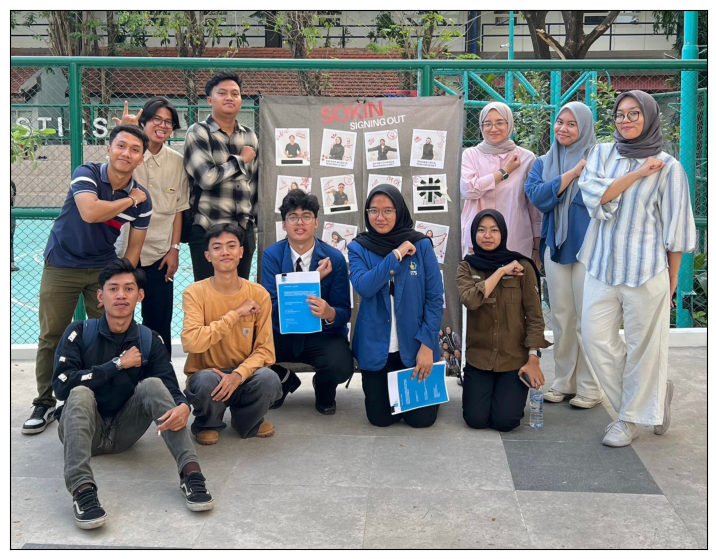

After applying face detection


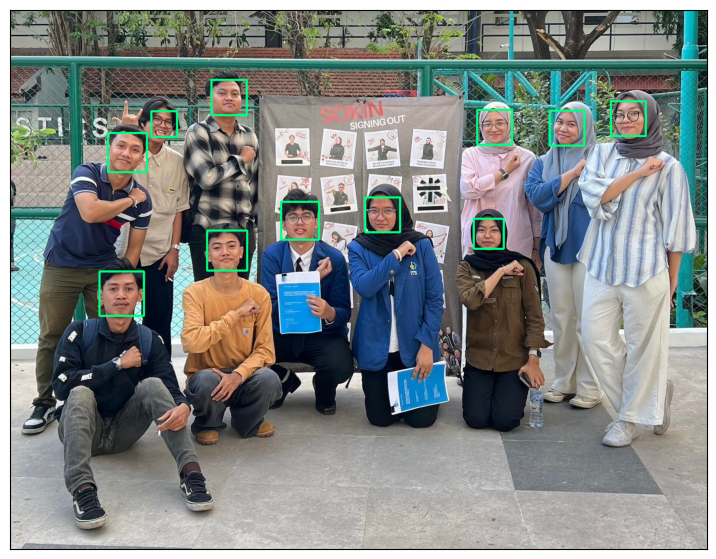

In [5]:
image_path = '/kaggle/input/test-image/tesfacedet.jpeg'
image = cv2.imread(image_path)

print("Original image")
show_image(image)

result_image = drawface(image_path)
print("After applying face detection")
show_image(result_image)